# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [50]:
# import libraries here 
import pandas as pd 
import numpy as np 
import re 

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer herew 
employee= pd.read_csv('/content/Employee.csv') 
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way 
employee.groupby('Department').Salary.mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [8]:
# your answer here-2nd way 
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [10]:
# your answer here 
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [12]:
# your answer here 
pd.pivot_table(employee, index=['Title'], columns=['Years'], values=['Salary'], fill_value=0)

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [13]:
# your answer here 
pd.pivot_table(employee, index=['Title'], columns=['Years'], values=['Salary'], fill_value=0, aggfunc=np.mean)

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [15]:
# your answer here 
pd.pivot_table(employee, index=['Department'], columns=['Title'], values=['Salary'], 
               aggfunc={'Salary':[np.mean, np.max, np.min, np.std]})

Salary                                                          \
             amax                    amin                    mean           
Title          VP analyst associate    VP analyst associate    VP analyst   
Department                                                                  
HR           70.0    35.0       NaN  70.0    30.0       NaN  70.0    32.5   
IT           70.0    35.0      60.0  70.0    30.0      60.0  70.0    32.5   
Sales         NaN     NaN      55.0   NaN     NaN      55.0   NaN     NaN   

                                          
                           std            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

#### Based on your comments, fill the missing values with an appropriate value

In [16]:
# your answer here 
pd.pivot_table(employee, index=['Department'], columns=['Title'], values=['Salary'], 
               aggfunc={'Salary':[np.mean, np.max, np.min, np.std]}, fill_value=0)

Salary                                                        \
             amax                   amin                   mean           
Title          VP analyst associate   VP analyst associate   VP analyst   
Department                                                                
HR             70      35         0   70      30         0   70    32.5   
IT             70      35        60   70      30        60   70    32.5   
Sales           0       0        55    0       0        55    0     0.0   

                                              
                     std                      
Title      associate  VP   analyst associate  
Department                                    
HR                 0   0  3.535534         0  
IT                60   0  3.535534         0  
Sales             55   0  0.000000         0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [22]:
# your answer here 
pd.pivot_table(employee, index=['Department'],  values=['Salary'], 
               aggfunc={'Salary':'sum', 'Department':'count'})

,Department,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [27]:
# your answer here 
pd.pivot_table(employee, index=['Department', 'Title'],  values=[ 'Years', 'Salary'], 
               aggfunc={'Salary':np.mean, 'Years':'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here--Your custom function here

        

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [29]:
# your answer here 
fitbit= pd.read_csv('/content/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [30]:
# your answer here 
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [ ]:
# your answer here

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [31]:
# your answer here 
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

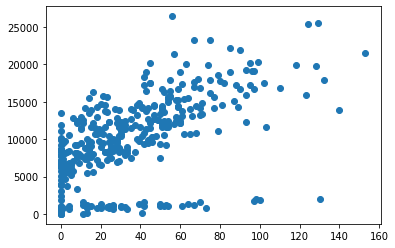

In [51]:
# your answer here 
import matplotlib.pyplot as plt
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your comment here 
#ther is a relation with the steps and the very active minutes

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [34]:
# your answer here 
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

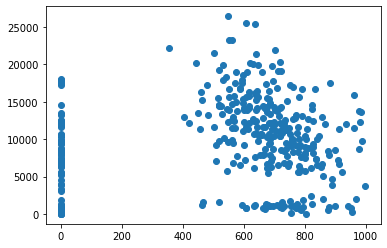

In [36]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

In [ ]:
# Your comment here 
# it seems like there isn't a realation between this variables 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [37]:
# your answer here 

fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

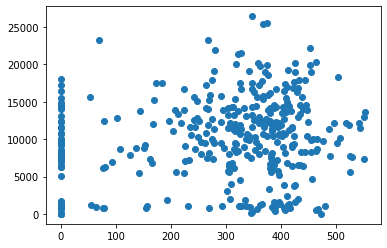

In [38]:
# your answer here 
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [39]:
# your answer here 
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr() 


In [40]:
#Print cor_fit 
print(cor_fit)

                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [41]:
# your answer here 
cor_fit.sort_values(['Steps'], ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [42]:
# your answer here 
time_grades = pd.read_csv('/content/Time_Grades.csv') 


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [43]:
#Print time_grades 
print(time_grades)

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36074cd50>,
      dtype=object)

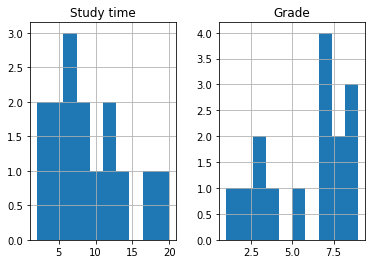

In [44]:
# your answer here 
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [46]:
# your answer here-Pearson  
time_grades['Study time'].corr(time_grades['Grade'], method= 'pearson')

0.7980456073578858

In [47]:
## your answer here-Spearman 
time_grades['Study time'].corr(time_grades['Grade'], method= 'spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

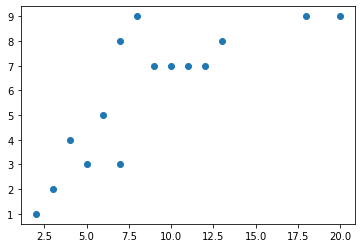

In [55]:
# your answer here 
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'])

In [ ]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#your comment here